### Ask: does subselecting for only significant units help with pref not pref decoding?

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
from scripts.pseudo_decoding.ccgp_value_configs import *
import scipy
import argparse
import copy

### With a full population of units

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with full population')

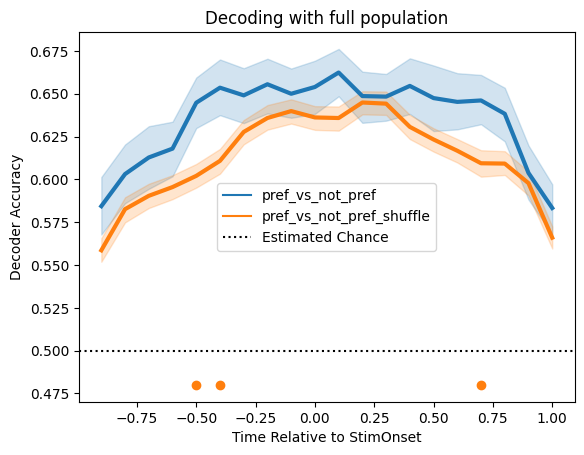

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with full population")


### With preference selective subpop

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with preference-selective population (p < 0.05)')

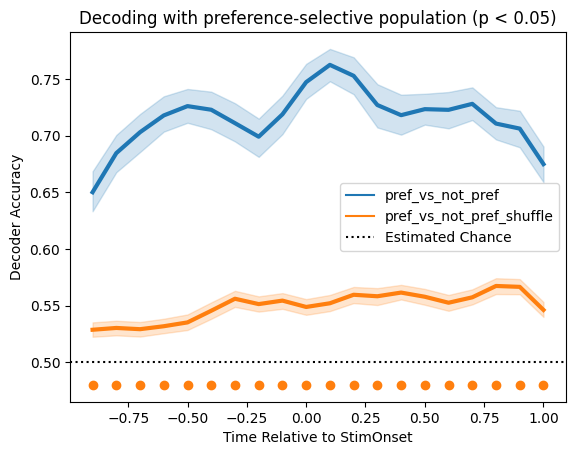

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with preference-selective population (p < 0.05)")


### What do they look like per-feature?

<Axes: xlabel='Time', ylabel='Accuracy'>

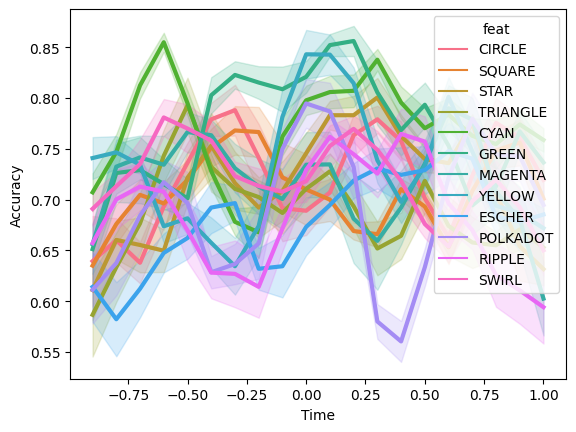

In [4]:
sub_res = res[~res.condition.str.contains("shuffle")]
fig, ax = plt.subplots()
sns.lineplot(sub_res, x="Time", y="Accuracy", hue="feat", errorbar="se", linewidth=3, ax=ax)

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


Text(0.5, 1.0, 'Decoding with preference-selective population (p < 0.05)')

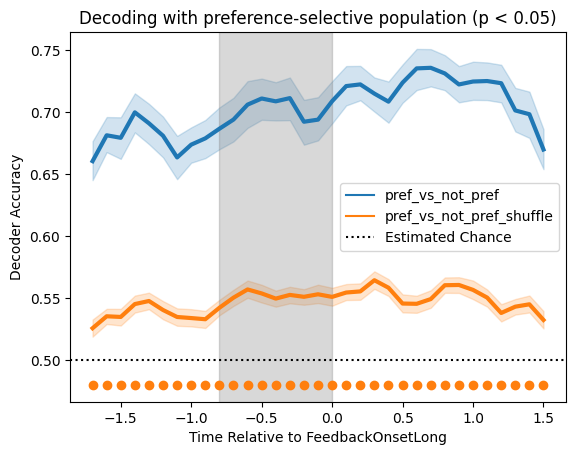

In [5]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")
ax.set_title("Decoding with preference-selective population (p < 0.05)")


<Axes: xlabel='Time', ylabel='Accuracy'>

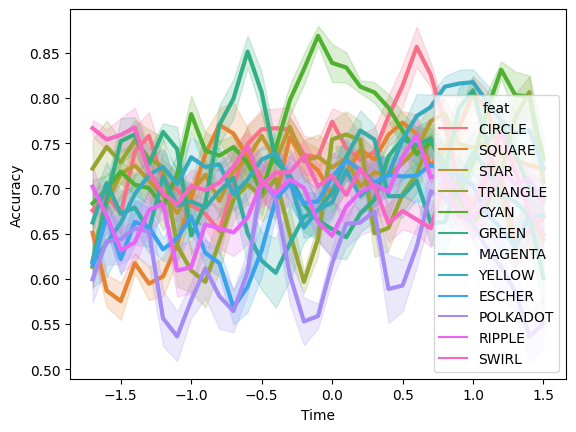

In [6]:
sub_res = res[~res.condition.str.contains("shuffle")]
fig, ax = plt.subplots()
sns.lineplot(sub_res, x="Time", y="Accuracy", hue="feat", errorbar="se", linewidth=3, ax=ax)

Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


<Axes: xlabel='TestTime', ylabel='TrainTime'>

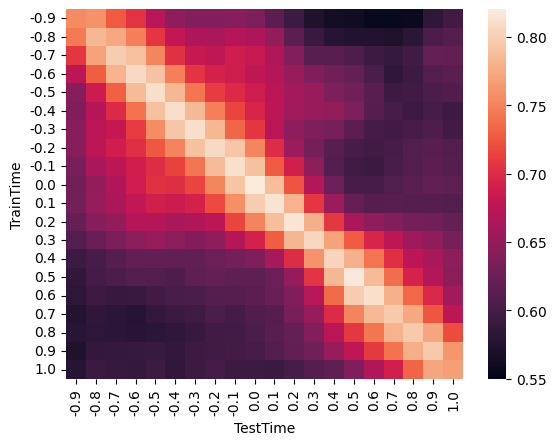

In [7]:
fig, ax = plt.subplots()
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "StimOnset"
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.condition = "pref_vs_not_pref"

shuffles = io_utils.read_selected_features(copy.deepcopy(args), FEATURES, [args.condition])
shuffle_means = shuffles[shuffles.condition.isin(["pref_vs_not_pref_shuffle"])].groupby(["Time", "condition"]).Accuracy.mean().reset_index(name="ShuffleAccuracy")

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
res = pd.merge(res, shuffle_means, left_on="TestTime", right_on="Time")
# res["Accuracy"] = res.apply(lambda x: 0.5 if x.Accuracy < x.ShuffleAccuracy else x.Accuracy, axis=1)

pivoted = res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")
sns.heatmap(pivoted, ax=ax, vmin=0.55)
# sns.heatmap(pivoted, ax=ax)

In [8]:
res

,TrainTime,TestTime,Accuracy,Time,condition,ShuffleAccuracy
0,-0.9,-0.9,0.755469,-0.9,pref_vs_not_pref_shuffle,0.528680
1,-0.8,-0.9,0.744766,-0.9,pref_vs_not_pref_shuffle,0.528680
2,-0.7,-0.9,0.707057,-0.9,pref_vs_not_pref_shuffle,0.528680
3,-0.6,-0.9,0.675807,-0.9,pref_vs_not_pref_shuffle,0.528680
4,-0.5,-0.9,0.642135,-0.9,pref_vs_not_pref_shuffle,0.528680
...,...,...,...,...,...,...
395,0.6,1.0,0.658047,1.0,pref_vs_not_pref_shuffle,0.546175
396,0.7,1.0,0.676042,1.0,pref_vs_not_pref_shuffle,0.546175
397,0.8,1.0,0.719557,1.0,pref_vs_not_pref_shuffle,0.546175
398,0.9,1.0,0.762083,1.0,pref_vs_not_pref_shuffle,0.546175


Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_vs_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_vs_not_pref_shuffle_9


<Axes: xlabel='TestTime', ylabel='TrainTime'>

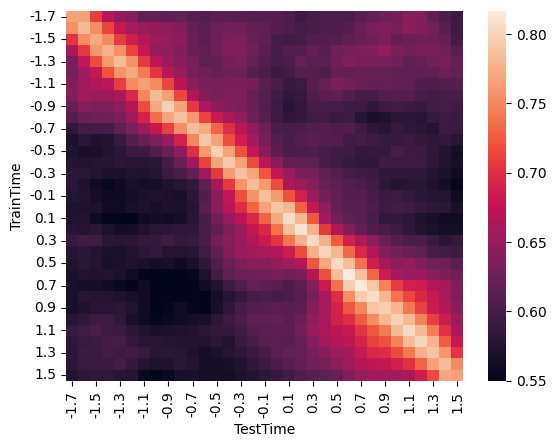

In [8]:
fig, ax = plt.subplots()
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.condition = "pref_vs_not_pref"

shuffles = io_utils.read_selected_features(copy.deepcopy(args), FEATURES, [args.condition])
shuffle_means = shuffles[shuffles.condition.isin(["pref_vs_not_pref_shuffle"])].groupby(["Time", "condition"]).Accuracy.mean().reset_index(name="ShuffleAccuracy")

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
res = pd.merge(res, shuffle_means, left_on="TestTime", right_on="Time")
# res["Accuracy"] = res.apply(lambda x: 0.5 if x.Accuracy < x.ShuffleAccuracy else x.Accuracy, axis=1)

res = io_utils.read_selected_features_cross_time(args, FEATURES, "pref_vs_not_pref", avg=True)
pivoted = res.pivot(index="TrainTime", columns="TestTime", values="Accuracy")
sns.heatmap(pivoted, ax=ax, vmin=0.55)

### Chosen, pref, not pref for FeedbackOnsetLong

Warning, shuffle not found: MAGENTA_chosen_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_not_pref_shuffle_0
Warning, shuffle not found: MAGENTA_chosen_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_not_pref_shuffle_3
Warning, shuffle not found: MAGENTA_chosen_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_not_pref_shuffle_6
Warning, shuffle not found: RIPPLE_pref_shuffle_9


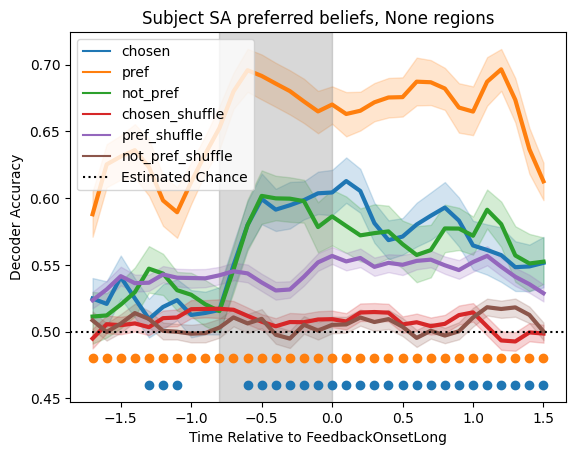

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### What does CCGP value look like for pref selective units?

Text(0.5, 1.0, 'CCGP Value, in preference-selective units')

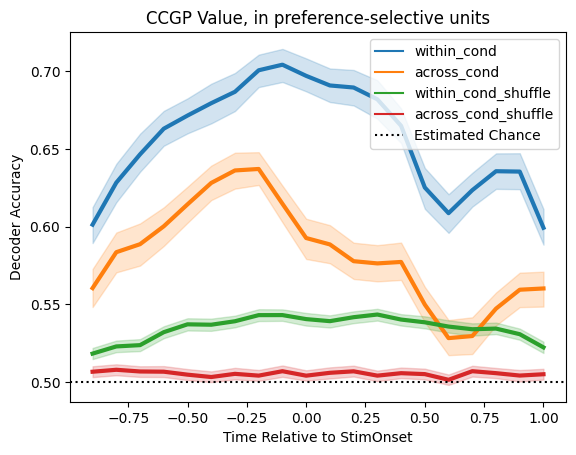

In [2]:
SAM_PAIRS_PATH = "/data/patrick_res/sessions/SA/pairs_at_least_3blocks_10sess_more_sess.pickle"

pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.sig_unit_level = "95th_all_time"

res = io_utils.read_ccgp_value(args, pairs)

fig, ax = plt.subplots()
sub_res = res[res.condition.isin(("within_cond", "across_cond", "within_cond_shuffle", "across_cond_shuffle"))]
visualization_utils.visualize_ccpg_value(args, sub_res, ax)
ax.set_title("CCGP Value, in preference-selective units")

In [5]:
pairs

,pair,sessions,num_sessions,dim_type
0,"[CIRCLE, SQUARE]","[20180615, 20180709, 20180802, 20180803, 20180...",14,within dim
1,"[CIRCLE, GREEN]","[20180802, 20180806, 20180808, 20180813, 20180...",11,across dim
2,"[CIRCLE, YELLOW]","[20180802, 20180810, 20180813, 20180821, 20180...",13,across dim
3,"[CIRCLE, RIPPLE]","[20180615, 20180802, 20180803, 20180810, 20180...",10,across dim
4,"[SQUARE, CYAN]","[20180801, 20180802, 20180803, 20180820, 20180...",11,across dim
5,"[SQUARE, GREEN]","[20180802, 20180806, 20180808, 20180830, 20180...",10,across dim
6,"[SQUARE, MAGENTA]","[20180801, 20180802, 20180803, 20180806, 20180...",11,across dim
7,"[SQUARE, YELLOW]","[20180801, 20180802, 20180810, 20180820, 20180...",12,across dim
8,"[SQUARE, ESCHER]","[20180803, 20180808, 20180810, 20180820, 20180...",10,across dim
9,"[CYAN, MAGENTA]","[20180705, 20180801, 20180802, 20180803, 20180...",11,within dim


In [6]:
across_dim_res = io_utils.read_ccgp_value(args, pairs[pairs.dim_type == "across dim"], num_shuffles=0)
across_dim_res = across_dim_res[across_dim_res.condition.isin(["across_cond", "within_cond"])]
across_dim_res["type"] = across_dim_res.condition + " across dim"

within_dim_res = io_utils.read_ccgp_value(args, pairs[pairs.dim_type == "within dim"], num_shuffles=0)
within_dim_res = within_dim_res[within_dim_res.condition.isin(["across_cond", "within_cond"])]
within_dim_res["type"] = within_dim_res.condition + " within dim"

dim_res = pd.concat((across_dim_res, within_dim_res))

Text(0.5, 1.0, 'CCGP of value across dimensions')

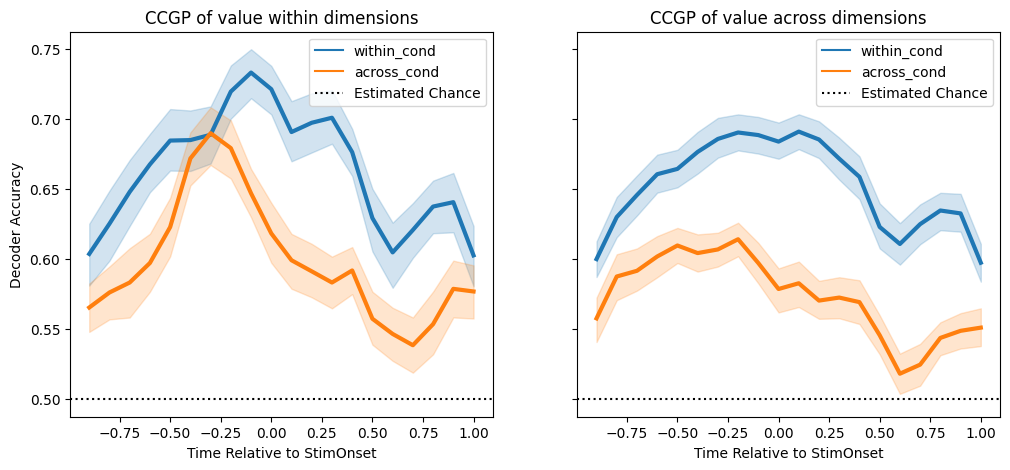

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

visualization_utils.visualize_ccpg_value(args, within_dim_res, ax1)
ax1.set_title("CCGP of value within dimensions")
visualization_utils.visualize_ccpg_value(args, across_dim_res, ax2)
ax2.set_title("CCGP of value across dimensions")



In [3]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.sig_unit_level = "95th_all_time"
models = io_utils.read_ccgp_models(args, pairs)
models["weights"] = models.apply(lambda x: x.models.coef_[0, :], axis=1)
weights = models[["Time", "pair", "feat", "run", "weights"]]

In [4]:
across_res = []
within_res = []
for i, row in pairs.iterrows():
    pair_weights = weights[weights.pair.apply(lambda x: x == row.pair)]
    weights_feat_1 = pair_weights[pair_weights.feat == row.pair[0]]
    weights_feat_2 = pair_weights[pair_weights.feat == row.pair[1]]
    sim_res = classifier_utils.get_cross_cond_cosine_sim_of_weights(weights_feat_1, weights_feat_2, merge_on=["Time"])
    if row.dim_type == "across dim":
        across_res.append(sim_res)
    else:
        within_res.append(sim_res)
across_res = pd.concat(across_res)
across_res["dim_type"] = "across"
within_res = pd.concat(within_res)
within_res["dim_type"] = "within"

Text(0.5, 1.0, 'Cosine sim between pairs of feature pref decoder weights by dimension type')

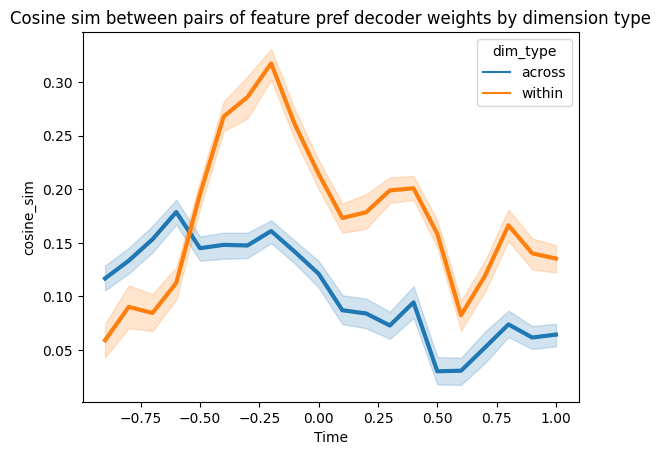

In [5]:
fig, ax = plt.subplots()
dim_sim_res = pd.concat([across_res, within_res])
sns.lineplot(dim_sim_res, x="Time", y="cosine_sim", hue="dim_type", linewidth=3, ax=ax)
ax.set_title("Cosine sim between pairs of feature pref decoder weights by dimension type")